importações

In [74]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd

leitura do csv

In [75]:
df = pd.read_csv('./bi/dataframe_cotacao.tsv', sep='\t')

variaveis de leitura do tsv

In [76]:
# variavel para guardar a liquidez
liquidez_valor = df['Liquidez Diária']
# variavel para guardar os valores das cotas
valor_cota = df['Preço Atual']

In [77]:
rotulo = df['Setor']

preparando o as listas dos graficos

In [78]:
lista_lq = [] #liquidez_diaria
lista_vc = [] #preço atual
for lq, vc in zip(liquidez_valor,valor_cota):
    try:
        lq = float(lq)
        vc = vc.split()
        vc = vc[-1]
        vc = vc.replace(',','.')
        vc = float(vc)
        lista_lq.append(lq)
        lista_vc.append(vc)
    except:
        pass

In [79]:
lista_lq = [] #liquidez_diaria
lista_vc = [] #preço atual
lista_rt = [] #rotulo
for lq, vc, rt in zip(liquidez_valor,valor_cota, rotulo):
    try:
        lq = float(lq)
        vc = vc.split()
        vc = vc[-1]
        vc = vc.replace(',','.')
        vc = float(vc)
        lista_lq.append(lq)
        lista_vc.append(vc)
        lista_rt.append(rt)
    except:
        pass

grafico de dispersão

In [80]:
grafico_s_rt = px.scatter(y=lista_lq, x=lista_vc)
grafico_s_rt.show()

In [81]:
grafico_c_rt = px.scatter(y=lista_lq, x=lista_vc, color=lista_rt)
grafico_c_rt.show()

Transformando em matriz

In [82]:
lista_cotacao = []
for x,y in zip(lista_lq, lista_vc):
    item = [x,y]
    lista_cotacao.append(item)

print(lista_cotacao)

[[2454.0, 2.38], [44041.0, 14.7], [2702.0, 6.29], [29.0, 842.0], [67.0, 9.4], [3.0, 93.0], [200.0, 165.0], [11.0, 84.96], [5.0, 351.0], [3597.0, 115.5], [1354.0, 4.49], [33.0, 33.85], [5.0, 112.0], [41.0, 784.0], [34.0, 62.01], [2823.0, 0.96], [98.0, 3.71], [22.0, 35.06], [408.0, 42.42], [5495.0, 910.0], [2130.0, 1.04], [1539.0, 81.89], [61.0, 94.0], [49.0, 240.99], [7.0, 86.48], [206.0, 12.78], [47.0, 7.1], [218.0, 70.25], [13485.0, 4.09], [1366.0, 79.6], [5157.0, 28.45], [148.0, 62.5], [109581.0, 8.06], [52.0, 98.84], [21378.0, 89.8], [9.0, 195.0], [23.0, 87.92], [2128.0, 97.0], [69685.0, 93.84], [35771.0, 97.12], [32195.0, 153.18], [3677.0, 13.99], [6629.0, 92.51], [567.0, 98.88], [15393.0, 99.13], [32541.0, 124.49], [61169.0, 9.4], [8879.0, 85.0], [107752.0, 7.73], [92795.0, 87.75], [709.0, 71.97], [480.0, 80.94], [365.0, 65.82], [3651.0, 101.87], [8659.0, 69.2], [919.0, 78.55], [36579.0, 103.7], [79.0, 109.5], [4545.0, 43.01], [18687.0, 80.0], [211.0, 87.58], [5147.0, 85.1], [1409

In [83]:
base_cotacoes = np.array(lista_cotacao)

treino

In [84]:
scaler_base = StandardScaler()
base_cotacoes = scaler_base.fit_transform(base_cotacoes)
base_cotacoes

array([[-2.70811973e-01, -8.69068912e-01],
       [ 3.91805095e-01, -7.57900752e-01],
       [-2.66860521e-01, -8.33787459e-01],
       [-3.09450163e-01,  6.70714944e+00],
       [-3.08844698e-01, -8.05724717e-01],
       [-3.09864428e-01, -5.13693488e-02],
       [-3.06725573e-01,  5.98314701e-01],
       [-3.09736962e-01, -1.23917401e-01],
       [-3.09832561e-01,  2.27666516e+00],
       [-2.52600241e-01,  1.51656917e-01],
       [-2.88338575e-01, -8.50029560e-01],
       [-3.09386430e-01, -5.85102842e-01],
       [-3.09832561e-01,  1.20075053e-01],
       [-3.09258964e-01,  6.18379285e+00],
       [-3.09370497e-01, -3.31004192e-01],
       [-2.64932595e-01, -8.81882125e-01],
       [-3.08350767e-01, -8.57067804e-01],
       [-3.09561696e-01, -5.74184541e-01],
       [-3.03411452e-01, -5.07772393e-01],
       [-2.22358887e-01,  7.32073993e+00],
       [-2.75974354e-01, -8.81160254e-01],
       [-2.85390919e-01, -1.51619207e-01],
       [-3.08940298e-01, -4.23459592e-02],
       [-3.

cluster

separando o numero de segmentos

In [85]:
n_cluster = df['Setor']
n_cluster = set(n_cluster)
n_cluster = len(n_cluster)
n_cluster

10

In [86]:
k_means_cotacao = KMeans(n_clusters=n_cluster)
k_means_cotacao.fit(base_cotacoes)

KMeans(n_clusters=10)

localizando os pontos de referencia

In [87]:
centroides = k_means_cotacao.cluster_centers_
centroides

array([[-0.1950306 ,  0.05961953],
       [-0.29132447,  6.37508871],
       [13.22465522, -0.79814507],
       [ 1.25942365, -0.75095274],
       [-0.30307685,  2.82939289],
       [ 5.01186504, -0.79963393],
       [-0.20543775, -0.70623123],
       [ 0.38052981, -0.02675523],
       [-0.25313533,  0.96525084],
       [-0.25685668, -0.18882009]])

vizualizando centros em 2D matematicamente pelo reverse scaler

In [88]:
# scaler_base.inverse_transform(k_means_cotacao.cluster_centers_)

add rotulos

In [89]:
rotulos = k_means_cotacao.labels_
rotulos

array([6, 6, 6, 1, 6, 9, 8, 9, 4, 0, 6, 6, 0, 1, 9, 6, 6, 6, 6, 1, 6, 9,
       0, 8, 9, 6, 6, 9, 6, 9, 6, 9, 3, 0, 0, 8, 9, 0, 7, 7, 7, 6, 0, 0,
       0, 7, 3, 9, 3, 3, 9, 9, 9, 0, 9, 9, 7, 0, 6, 9, 9, 9, 9, 9, 9, 3,
       6, 0, 0, 8, 7, 0, 4, 0, 6, 0, 9, 9, 6, 7, 7, 0, 9, 7, 3, 0, 9, 9,
       0, 7, 9, 6, 9, 3, 7, 6, 8, 9, 0, 9, 9, 9, 0, 9, 6, 9, 9, 0, 9, 0,
       0, 7, 0, 9, 3, 9, 8, 8, 7, 0, 2, 9, 0, 6, 7, 9, 6, 9, 0, 7, 9, 9,
       7, 0, 0, 0, 9, 1, 0, 0, 0, 9, 0, 0, 0, 0, 9, 6, 0, 8, 9, 9, 9, 5,
       3, 0, 9, 6, 0, 0, 0, 7, 9, 0, 8, 8, 6, 9, 8, 0, 9, 9, 9, 9, 0, 6,
       9, 0, 9, 9, 0, 0, 6, 0, 6, 3, 9, 9, 7, 9, 9, 3, 7, 9, 7, 9, 7, 0,
       9, 9, 0, 7, 9, 0, 9, 0, 0, 0, 7, 0, 9, 7, 9, 0, 0, 1, 8, 9, 9, 9,
       7, 9, 9, 0, 9, 0, 7, 6, 9, 5, 7, 7, 3, 7, 7, 0, 9, 9, 9, 9, 9, 0,
       9, 9, 9, 0, 0, 0, 0, 9, 9, 9, 9, 0, 0, 7, 0, 0, 0, 0, 0, 7, 0, 0,
       6, 9, 6, 9])

grafico do cluster

In [90]:
grafico_cluster = px.scatter(y=base_cotacoes[:,0], x=base_cotacoes[:,1], color=rotulos)
grafico_centroid = px.scatter(y=centroides[:,0], x=centroides[:,1], size=[1,2,3,4,5,6,7,8,9,10])
grafico_geral = go.Figure(data=grafico_cluster.data + grafico_centroid.data)
grafico_geral.show()

In [91]:
n_cluster = df['Setor']
n_cluster = set(n_cluster)
nome_cluster = n_cluster
for id, x in enumerate(nome_cluster):
    id_n = id+1
    print(id_n,x)

1 nan
2 Híbrido
3 Outros
4 Lajes Corporativas
5 Hospital
6 Shoppings
7 Títulos e Val. Mob.
8 Residencial
9 Hotel
10 Logística


o Y referece ao numero de ações em circulação
o X referece ao valor da ação

logo quanto mais a direita mais cara é a ação e quanto mais alta mais fácil a liquidez da ação.

In [92]:
nome_rotulo = df['Códigodo fundo']

In [93]:
grafico_c_rt = px.scatter(y=lista_lq, x=lista_vc, color=lista_rt, labels=nome_rotulo)
grafico_c_rt.show()

In [94]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

gerando as linhas de hieraquia

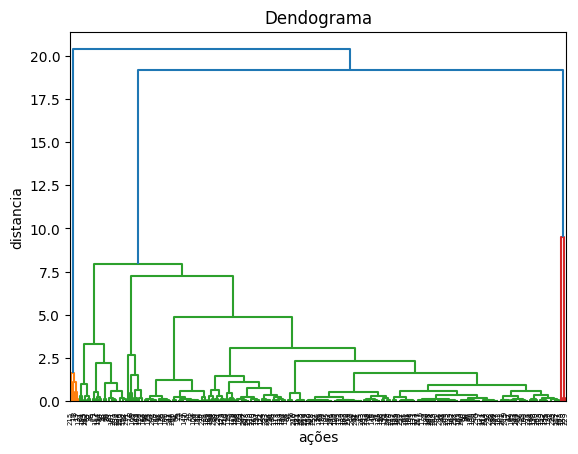

In [95]:
dendograma = dendrogram(linkage(base_cotacoes, method='ward'))
plt.title('Dendograma')
plt.xlabel('ações')
plt.ylabel('distancia')
plt.show()

com sklearn

In [96]:
from sklearn.cluster import AgglomerativeClustering

In [97]:
n_cluster = df['Setor']
n_cluster = set(n_cluster)
n_cluster = len(n_cluster)
n_cluster

10

In [98]:
hc_cotas = AgglomerativeClustering(n_clusters=n_cluster, linkage='ward', affinity='euclidean')
rotulos = hc_cotas.fit_predict(base_cotacoes)

In [99]:
rotulos

array([6, 1, 6, 4, 6, 0, 0, 0, 2, 0, 6, 6, 0, 4, 0, 6, 6, 6, 6, 4, 6, 0,
       0, 2, 0, 6, 6, 0, 6, 0, 6, 0, 8, 0, 3, 2, 0, 0, 1, 3, 3, 6, 0, 0,
       3, 3, 1, 0, 8, 1, 0, 0, 0, 0, 0, 0, 3, 0, 6, 3, 0, 0, 0, 0, 6, 8,
       6, 0, 0, 0, 3, 0, 9, 0, 6, 0, 0, 0, 6, 1, 1, 0, 0, 1, 8, 0, 0, 0,
       3, 3, 0, 6, 0, 1, 3, 6, 0, 0, 3, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0,
       3, 3, 0, 0, 1, 0, 2, 3, 3, 3, 7, 0, 3, 3, 3, 0, 6, 0, 3, 3, 0, 0,
       3, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 2, 0, 0, 0, 5,
       8, 0, 0, 1, 3, 0, 0, 1, 0, 3, 2, 2, 6, 6, 2, 3, 0, 0, 0, 0, 0, 6,
       0, 3, 0, 3, 0, 0, 6, 0, 6, 8, 0, 0, 3, 0, 0, 1, 1, 0, 3, 0, 3, 3,
       0, 0, 0, 1, 6, 0, 0, 0, 0, 0, 3, 0, 3, 1, 0, 0, 0, 4, 0, 0, 0, 0,
       3, 0, 0, 0, 3, 0, 1, 6, 0, 5, 1, 3, 8, 3, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 3, 0, 1, 0, 3, 0, 0, 0, 3, 0, 0,
       6, 0, 6, 0], dtype=int64)

In [100]:
grafico_cluster = px.scatter(y=base_cotacoes[:,0], x=base_cotacoes[:,1], color=rotulos)
grafico_cluster.show()

In [101]:
valor_cota = df['Preço Atual']
rendimento_cota = df['Dividendo']

In [102]:
lista_rend = [] #liquidez_diaria
lista_vc = [] #preço atual
for rd, vc in zip(rendimento_cota,valor_cota):
    try:
        rd = rd.split()
        rd = rd[-1]
        rd = rd.replace(',','.')
        rd = float(rd)
        vc = vc.split()
        vc = vc[-1]
        vc = vc.replace(',','.')
        vc = float(vc)
        lista_rend.append(rd)
        lista_vc.append(vc)
    except:
        pass

In [103]:
lista_cotacao = []
for x,y in zip(lista_rend, lista_vc):
    item = [x,y]
    lista_cotacao.append(item)

print(lista_cotacao)

[[0.0, 2.38], [0.0, 14.7], [0.0, 6.29], [0.0, 842.0], [0.0, 9.4], [1.38, 93.0], [0.22, 165.0], [0.25, 84.96], [0.48, 351.0], [0.0, 115.5], [0.0, 4.49], [0.0, 33.85], [1.62, 112.0], [9.16, 784.0], [0.64, 62.01], [0.0, 0.96], [0.0, 3.71], [0.32, 35.06], [0.17, 42.42], [10.76, 910.0], [6.8, 1.04], [0.0, 81.89], [0.75, 94.0], [2.49, 240.99], [0.33, 86.48], [0.09, 12.78], [0.1, 7.1], [0.0, 70.25], [0.0, 4.09], [0.75, 79.6], [0.18, 28.45], [0.15, 62.5], [0.17, 8.06], [0.75, 98.84], [0.92, 89.8], [1.68, 195.0], [1.15, 87.92], [1.45, 97.0], [1.04, 93.84], [1.16, 97.12], [0.91, 153.18], [0.27, 13.99], [1.0, 92.51], [0.98, 98.88], [1.4, 99.13], [0.82, 124.49], [1.31, 9.4], [0.93, 85.0], [0.07, 7.73], [0.49, 87.75], [0.62, 71.97], [1.02, 80.94], [0.56, 65.82], [1.52, 101.87], [0.75, 69.2], [0.56, 78.55], [1.2, 103.7], [1.01, 109.5], [0.4, 43.01], [0.58, 80.0], [1.0, 87.58], [1.19, 85.1], [0.62, 75.44], [0.41, 72.51], [0.4, 54.73], [0.14, 10.25], [0.12, 14.21], [0.54, 112.0], [0.74, 108.49], [0.46

In [104]:
base_cotacoes = np.array(lista_cotacao)
scaler_base = StandardScaler()
base_cotacoes_rend = scaler_base.fit_transform(base_cotacoes)
base_cotacoes_rend

array([[-7.68953543e-01, -8.69068912e-01],
       [-7.68953543e-01, -7.57900752e-01],
       [-7.68953543e-01, -8.33787459e-01],
       [-7.68953543e-01,  6.70714944e+00],
       [-7.68953543e-01, -8.05724717e-01],
       [ 4.13884615e-01, -5.13693488e-02],
       [-5.80385141e-01,  5.98314701e-01],
       [-5.54671268e-01, -1.23917401e-01],
       [-3.57531575e-01,  2.27666516e+00],
       [-7.68953543e-01,  1.51656917e-01],
       [-7.68953543e-01, -8.50029560e-01],
       [-7.68953543e-01, -5.85102842e-01],
       [ 6.19595599e-01,  1.20075053e-01],
       [ 7.08234901e+00,  6.18379285e+00],
       [-2.20390919e-01, -3.31004192e-01],
       [-7.68953543e-01, -8.81882125e-01],
       [-7.68953543e-01, -8.57067804e-01],
       [-4.94672231e-01, -5.74184541e-01],
       [-6.23241596e-01, -5.07772393e-01],
       [ 8.45375557e+00,  7.32073993e+00],
       [ 5.05952434e+00, -8.81160254e-01],
       [-7.68953543e-01, -1.51619207e-01],
       [-1.26106718e-01, -4.23459592e-02],
       [ 1.

lembrando que já temos o setor

In [105]:
k_means_cotacao = KMeans(n_clusters=n_cluster)
k_means_cotacao.fit(base_cotacoes_rend)

KMeans(n_clusters=10)

In [106]:
centroides = k_means_cotacao.cluster_centers_
centroides

array([[ 5.53474211e-01,  1.30982186e+00],
       [-6.81312092e-01, -7.68530305e-01],
       [ 7.77948068e+00,  6.28004234e+00],
       [-8.91305672e-02,  5.49164554e-03],
       [-7.68953543e-01,  6.70714944e+00],
       [ 5.05952434e+00, -8.81160254e-01],
       [ 3.07098482e+00,  6.32816708e+00],
       [ 3.15947077e-01,  1.52765191e-02],
       [-3.49220020e-01, -2.42386303e-01],
       [ 2.05957249e+00,  2.58576137e+00]])

In [107]:
rotulos = k_means_cotacao.labels_
rotulos

array([1, 1, 1, 4, 1, 7, 3, 8, 0, 8, 1, 1, 7, 2, 8, 1, 1, 1, 1, 2, 5, 8,
       3, 0, 8, 1, 1, 8, 1, 3, 1, 8, 1, 3, 3, 0, 7, 7, 7, 7, 3, 1, 3, 3,
       7, 3, 7, 3, 1, 8, 8, 3, 8, 7, 8, 8, 7, 3, 8, 8, 3, 7, 8, 8, 8, 1,
       1, 3, 3, 3, 3, 3, 9, 3, 1, 7, 8, 7, 8, 7, 3, 7, 3, 3, 1, 3, 8, 8,
       3, 8, 8, 1, 7, 1, 8, 8, 7, 3, 3, 3, 8, 3, 7, 3, 1, 8, 3, 3, 3, 7,
       7, 3, 7, 8, 1, 8, 0, 7, 7, 3, 1, 3, 3, 8, 3, 8, 1, 3, 7, 7, 3, 8,
       7, 3, 7, 3, 3, 6, 3, 3, 3, 8, 3, 3, 7, 7, 8, 1, 3, 0, 8, 8, 8, 1,
       1, 7, 3, 1, 3, 3, 8, 3, 3, 3, 0, 0, 1, 8, 9, 3, 8, 7, 8, 3, 3, 8,
       8, 3, 8, 8, 3, 3, 1, 3, 1, 1, 8, 8, 8, 7, 8, 1, 7, 8, 7, 3, 8, 7,
       8, 7, 7, 7, 8, 7, 3, 3, 3, 3, 8, 7, 8, 3, 3, 3, 3, 2, 3, 8, 8, 3,
       3, 8, 7, 7, 8, 7, 7, 1, 3, 1, 3, 7, 1, 7, 7, 7, 8, 8, 7, 3, 8, 7,
       8, 7, 3, 8, 7, 3, 7, 7, 7, 3, 3, 7, 7, 3, 7, 3, 7, 7, 7, 3, 3, 3,
       1, 3, 1, 8])

In [108]:
n_cluster = df['Setor']
n_cluster = set(n_cluster)
nome_cluster = n_cluster
for id, x in enumerate(nome_cluster):
    id_n = id+1
    print(id_n,x)

1 nan
2 Híbrido
3 Outros
4 Lajes Corporativas
5 Hospital
6 Shoppings
7 Títulos e Val. Mob.
8 Residencial
9 Hotel
10 Logística


In [109]:
nome_rotulo = df['Códigodo fundo']
grafico_c_rt = px.scatter(y=lista_rend, x=lista_vc, color=lista_rt, labels=nome_rotulo)
grafico_c_rt.show()

In [110]:
grafico_cluster = px.scatter(y=base_cotacoes_rend[:,0], x=base_cotacoes_rend[:,1], color=rotulos)
grafico_centroid = px.scatter(y=centroides[:,0], x=centroides[:,1], size=[1,2,3,4,5,6,7,8,9,10])
grafico_geral = go.Figure(data=grafico_cluster.data + grafico_centroid.data)
grafico_geral.show()

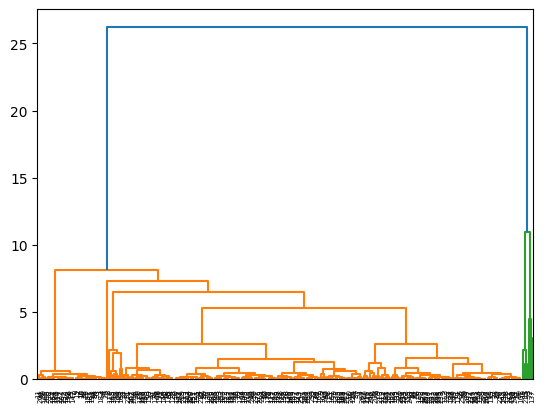

In [111]:
dendograma_rendimento = dendrogram(linkage(base_cotacoes_rend, method='ward'))

se imaginarmo uma linha entre 10 e 15 temos ali 3 linhas verticais

In [117]:
hc_rendimento = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
rotulo_hc = hc_rendimento.fit_predict(base_cotacoes_rend)

In [118]:
rotulo_hc

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int64)

In [119]:
grafico_cluster_rend = px.scatter(y=base_cotacoes_rend[:,0], x=base_cotacoes_rend[:,1], color=rotulo_hc)
grafico_cluster_rend.show()

como já vista no demograma, a massa de ações está em azul